# 3 Exploratory Data Analysis

## 3.1 Contents <a id='3.1_Contents'></a>
* [3.2 Introduction](#3.2_Introduction)
* [3.3 Imports](#3.3_Imports)
* [3.4 Load the Data](#3.4_Load_the_Data)
    * [3.4.1 Summary Statistics](#3.4.1_Summary_Statistics)
    * [3.4.2 Remove NaN values](#3.4.2_Remove_NaN_values)
    * [3.4.3 Map categorical features to numeric values](#3.4.3_Map_categorical_features_to_numeric_values)
* [3.5 Explore the data](#3.5_Explore_the_data)
    * [3.5.1 WordCloud by Title](#3.5.1_WordCloud_by_Title)
    * [3.5.2 WordCloud by Text](#3.5.2_WordCloud_by_Text)
    * [3.5.3 Histograms of True and Fake labels in the data](#3.5.3_Histograms_of_True_and_Fake_labels_in_the_data)
    * [3.5.4 Pie-chart showing various data sources](#3.5.4_Pie-chart_showing_various_data_sources)
* [3.6 Visualizing high dimensional data](#3.6_Visualizing_high_dimensional_data)
    * [3.6.1 Creating unigrams from vectorized data](#3.6.1_Visualizing_high_dimensional_data)
    * [3.6.2 Creating bigrams from vectorized data](#3.6.2_Creating_bigrams_from_vectorized_data)
    * [3.6.3 Creating trigrams from vectorized data](3.6.3_Creating_trigrams_from_vectorized_data)
* [3.7 Feature Engineering with Count Vectorizer and Tfidf Vectorizer](#3.7_Feature_Engineering_with_Count_Vectorizer_and_Tfidf_Vectorizer)
* [3.8 Initial Models and Performance Analysis](#3.8_Initial_Models_and_Performance_Analysis)
    * [3.8.1 MultiNomial Naive Bayes](#3.8.1_MultiNomial_Naive_Bayes)
    * [3.8.2 Logistic Regression](#3.8.1_Logistic_Regression)
    * [3.8.3 Support Vector Classifier](#3.8.3_Support_Vector_Classifier)
    * [3.8.4 Random Forest Classifier](#3.8.4_Random_Forest_Classifier)
* [3.9 Summary](#3.9_Summary)

## 3.2 Introduction<a id='3.2_Introduction'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.util import ngrams
import nltk.corpus
import seaborn as sns
from matplotlib import rcParams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

## 3.4 Load the Data<a id='3.4_Load the Data'></a>

In [37]:
df = pd.read_csv('cleaned_data.csv',index_col=None)

### 3.4.1 Summary Statistics<a id='3.4.1_Summary Statistics'></a>

In [38]:
df.describe()

,title,text,subject,date,label
count,44898,44267,44898,44898,44898
unique,38681,38637,8,2397,2
top,factbox trump fill top job administration,reuters highlights us president donald trum...,politicsnews,"December 20, 2017",FAKE
freq,14,8,11272,182,23481


### 3.4.2 Remove NaN values<a id='3.4.2_Remove_NaN_Values'></a>

In [4]:
df.isnull().sum()

title        0
text       631
subject      0
date         0
label        0
dtype: int64

### 3.4.3 Map categorical features to numeric values<a id='3.5.1_Map_categorical_features_to_numeric_values'></a>

In [3]:
# df_sampled =df.sample(frac=0.1,random_state=42)
# df_sampled.label.value_counts()
# df = df_sampled
df['label'] = df['label'].map({'FAKE':0, 'TRUE':1, np.nan:2} )

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

## 3.5 Explore the data<a id='3.5_Explore_the_data'></a>

In [7]:
df.head()

,title,text,subject,date,label
0,as us budget fight loom republicans flip fisc...,washington reuters the head conservative re...,politicsnews,"December 31, 2017",1
1,us military accept transgender recruit monday ...,washington reuters transgender people allow...,politicsnews,"December 29, 2017",1
2,senior us republican senator let mr mueller job,washington reuters the special counsel inve...,politicsnews,"December 31, 2017",1
3,fbi russia probe helped australian diplomat ti...,washington reuters trump campaign adviser g...,politicsnews,"December 30, 2017",1
4,trump want postal service charge much amazon ...,seattlewashington reuters president donald ...,politicsnews,"December 29, 2017",1


In [8]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 1000,
        height = 500,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

### 3.5.1 WordCloud by Title<a id='3.5.1_WordCloud_by_Title'></a>

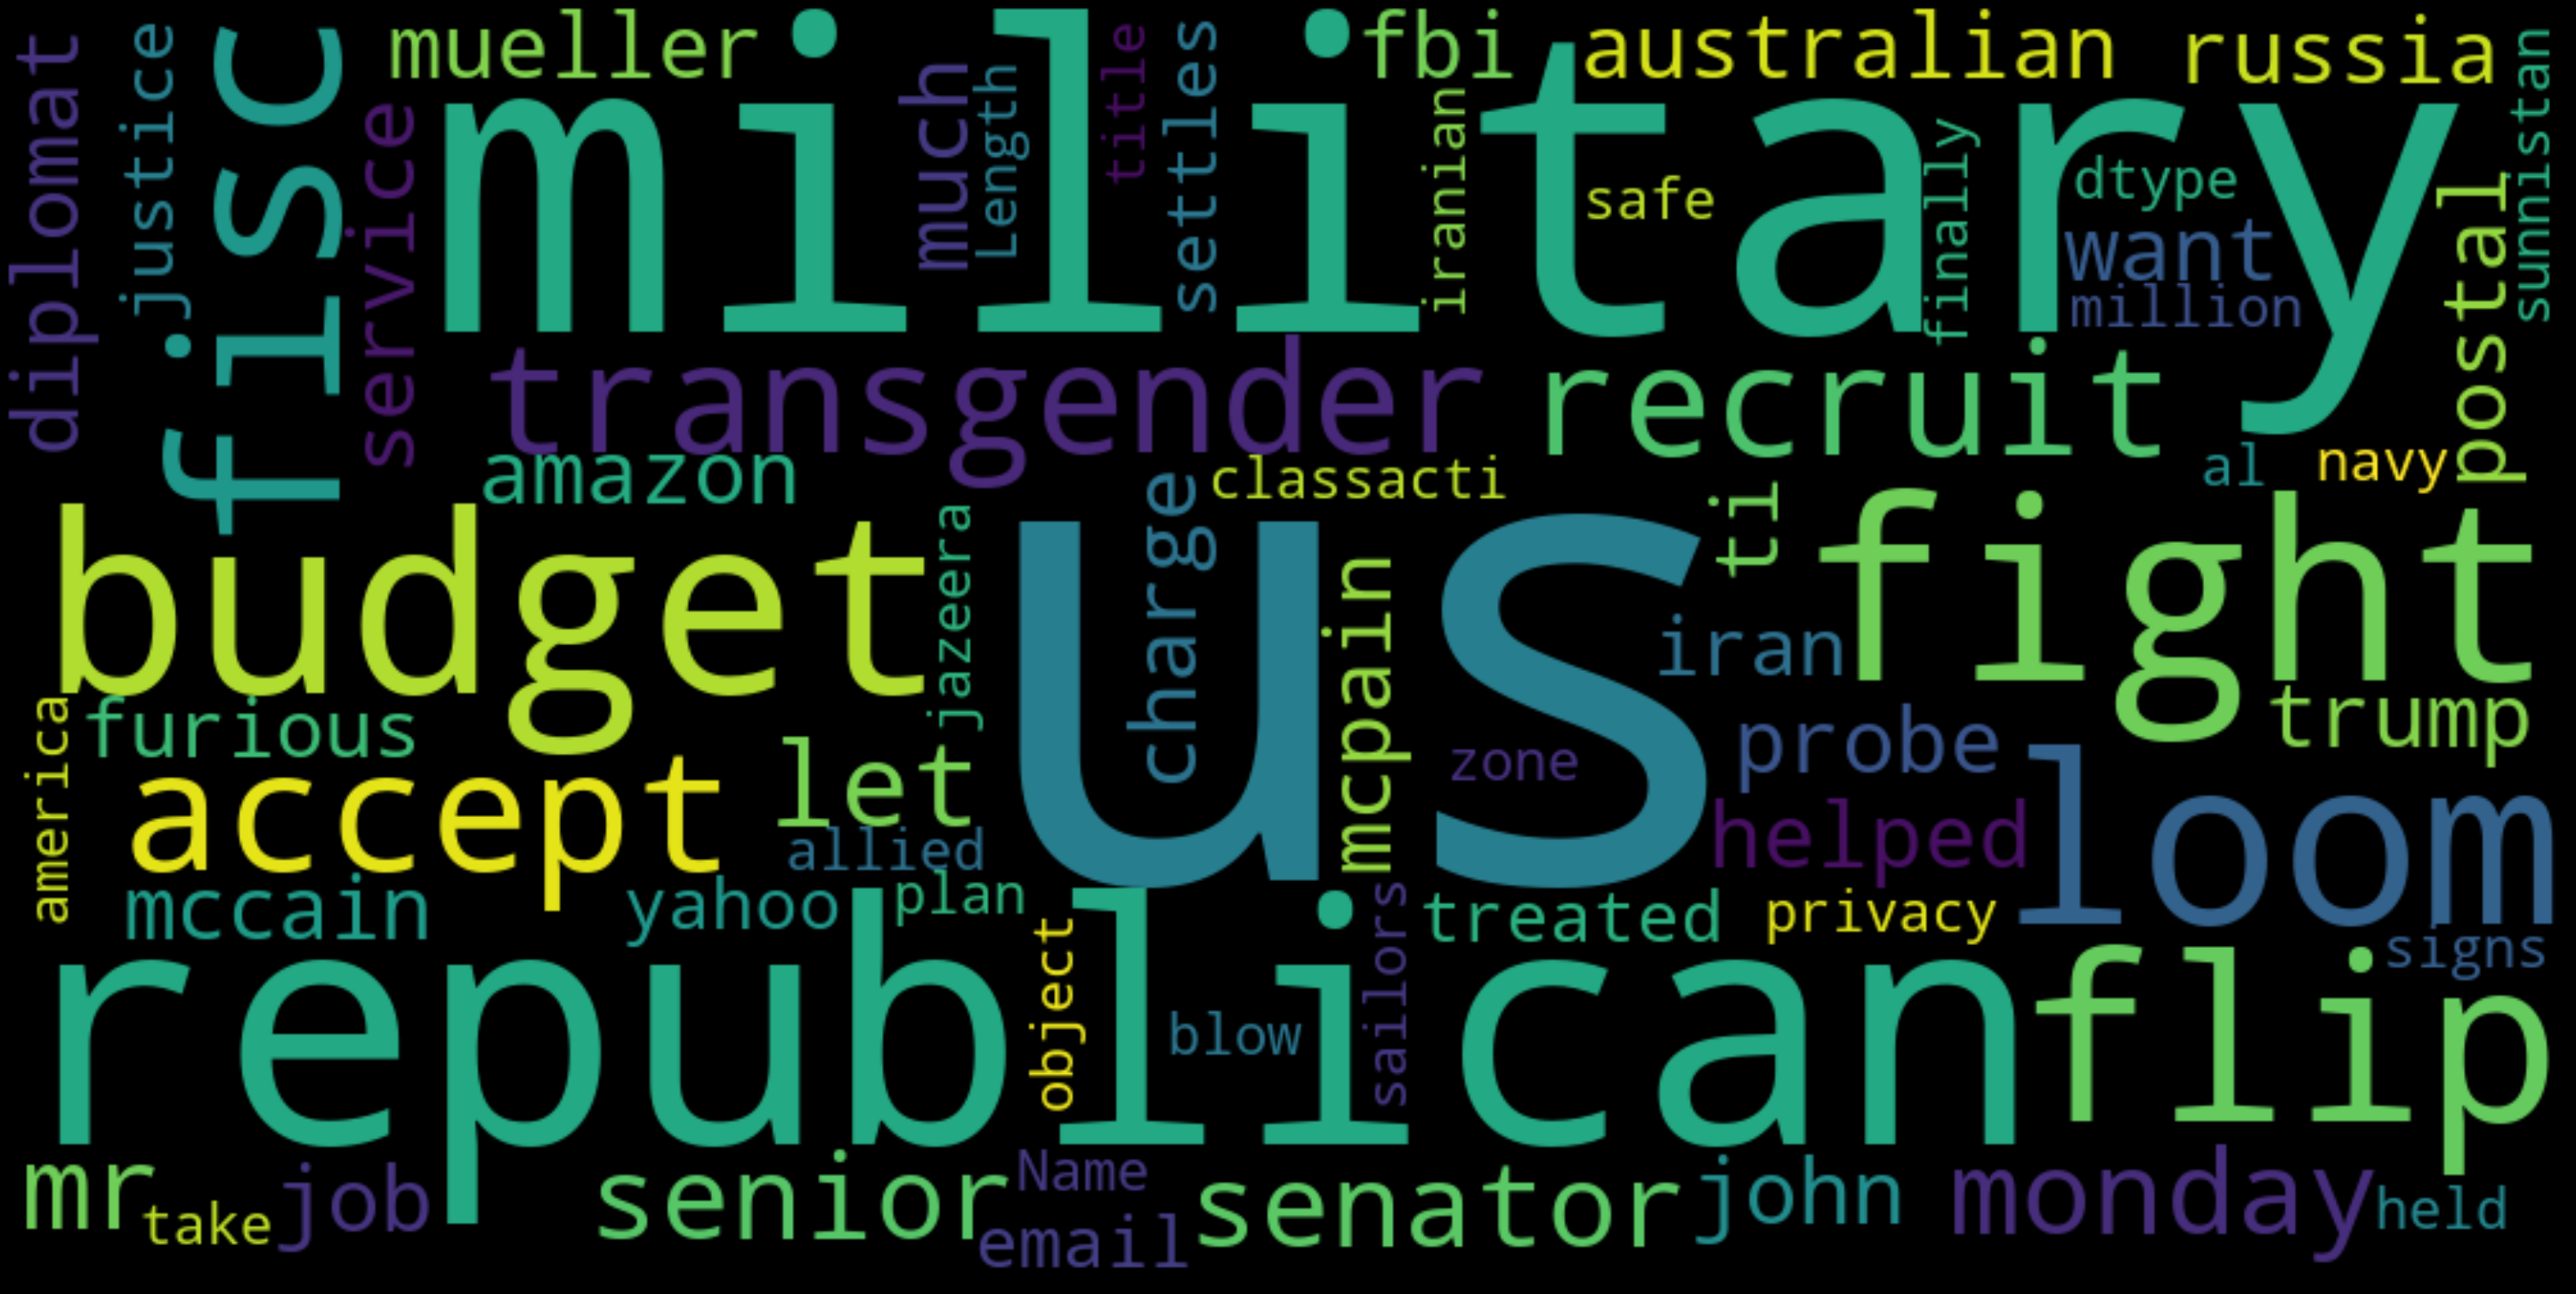

In [9]:
generate_word_cloud(df.title)

### 3.5.2 WordCloud by Text<a id='3.5.2_WordCloud_by_Text'></a>

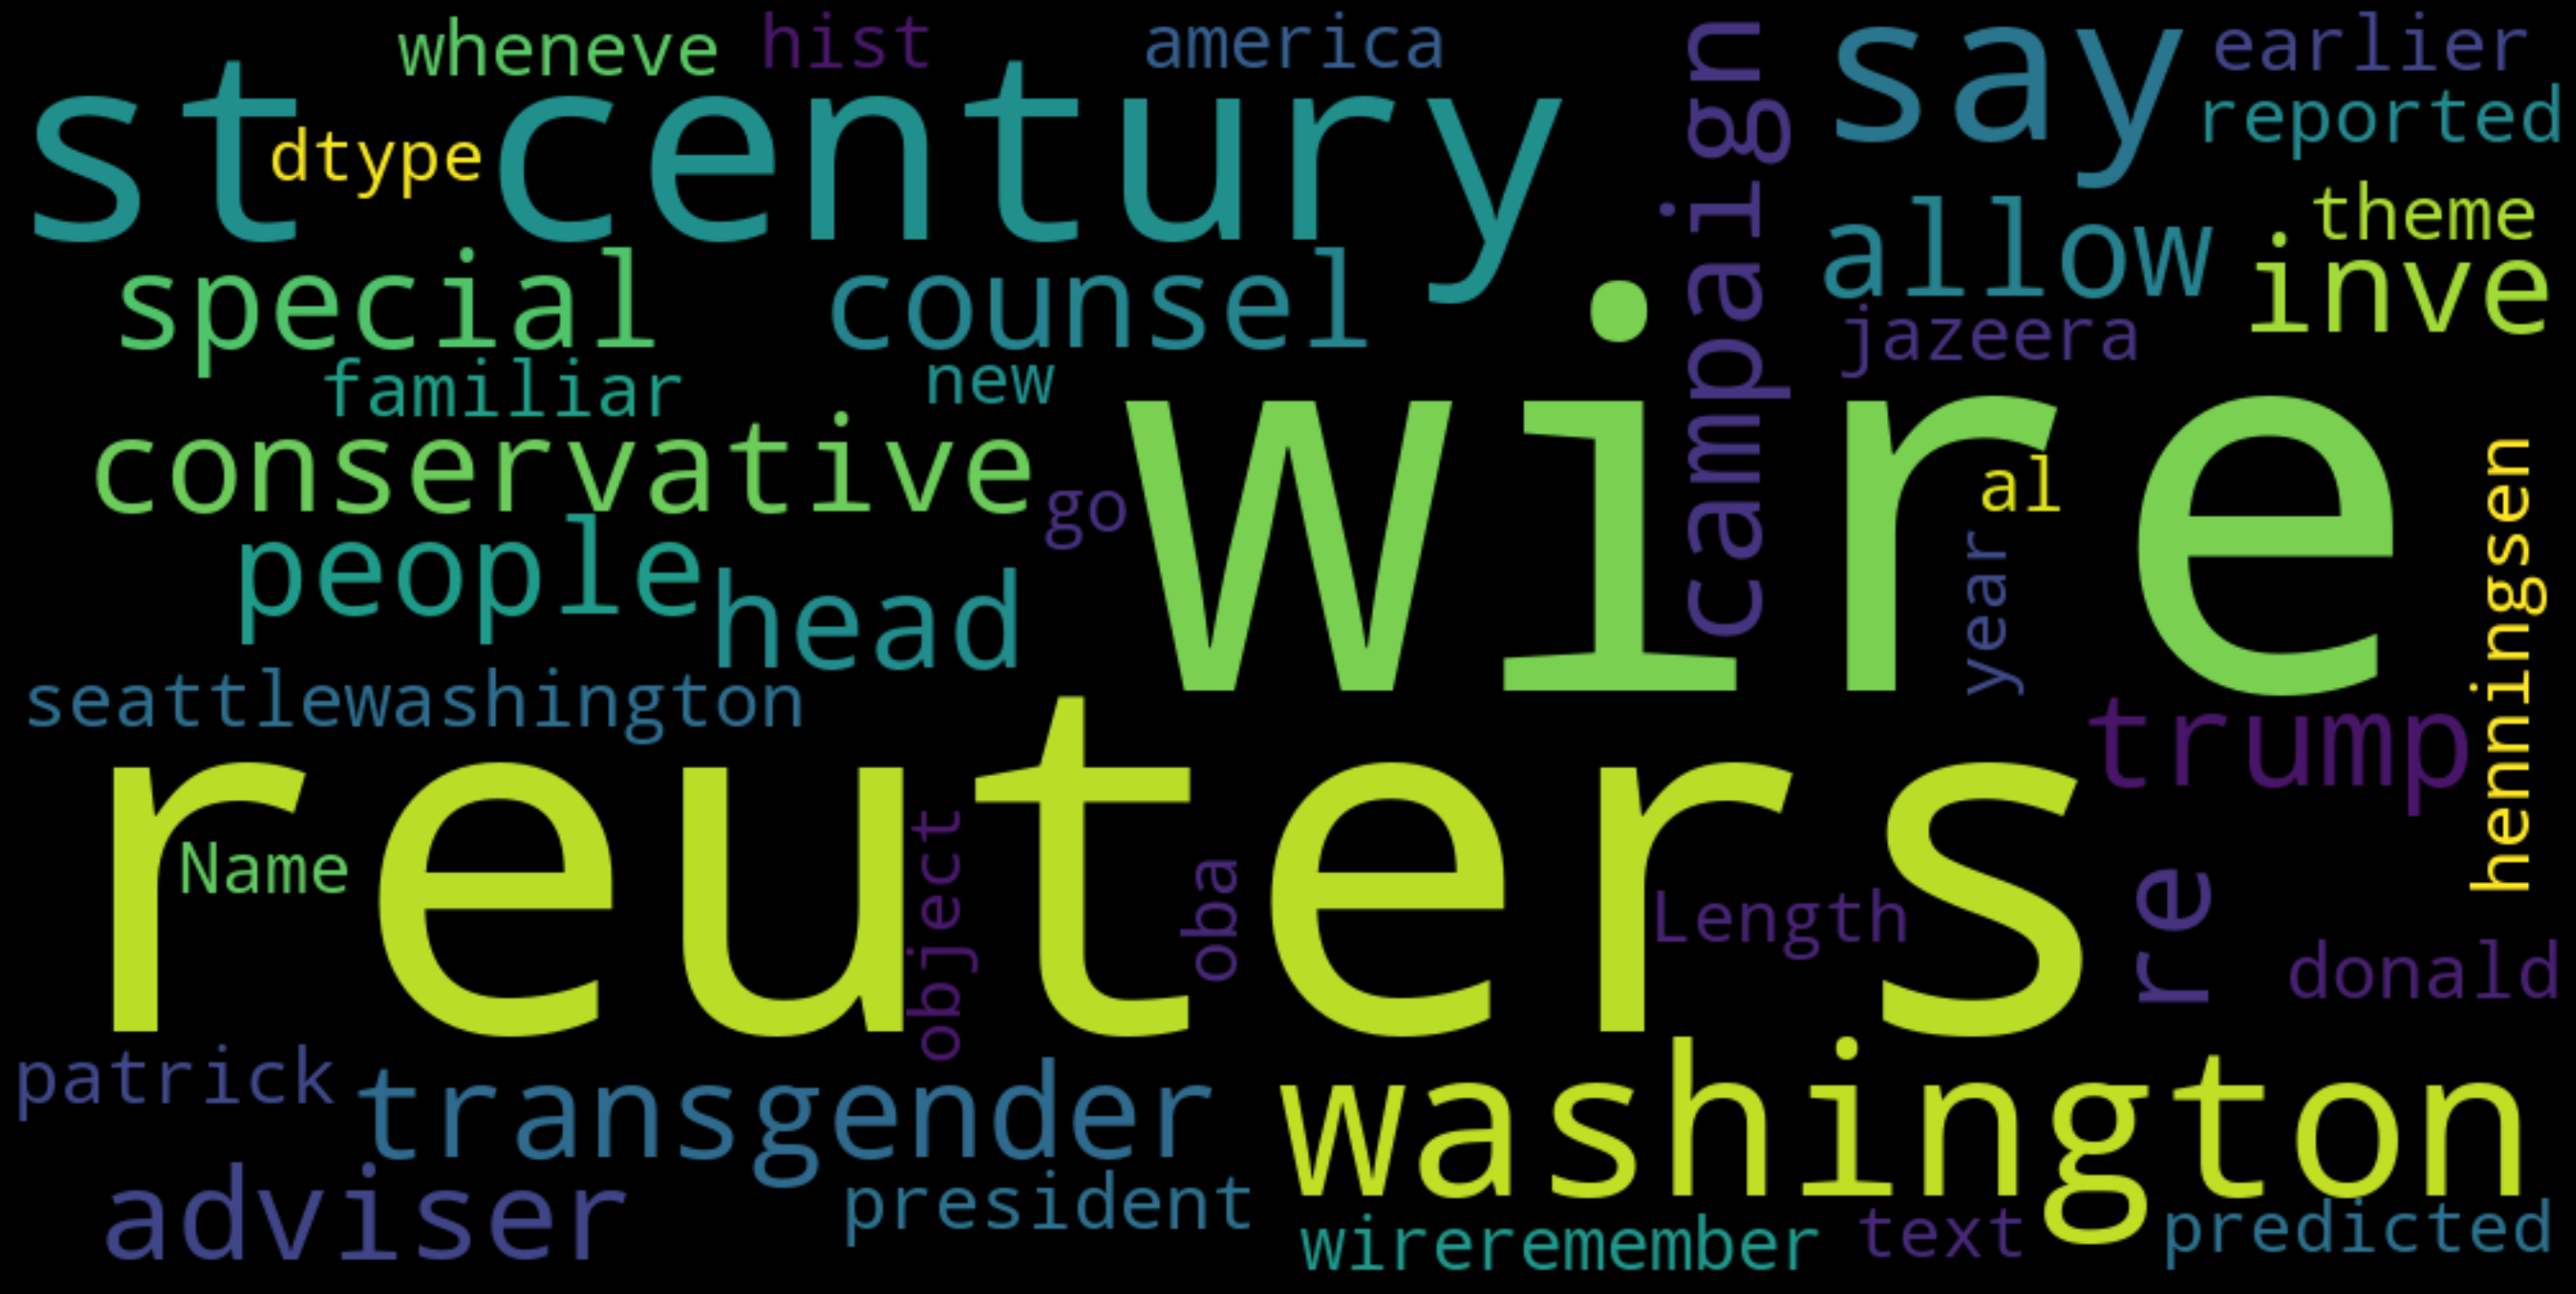

In [10]:
generate_word_cloud(df.text)

### 3.5.3 Histograms of True and Fake labels in the data<a id='3.5.3_Histograms_of_True_and_Fake_labels_in_the_data'></a>

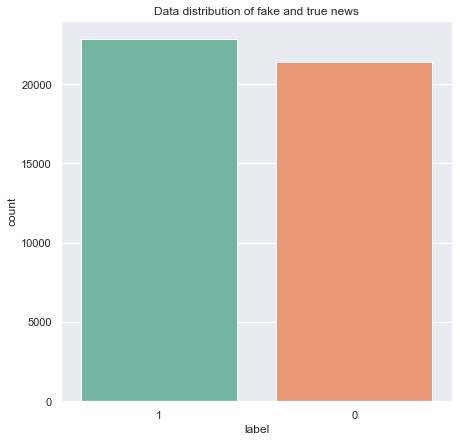

In [11]:
plt.figure(figsize=(7, 7))
sns.set(style="darkgrid")

color = sns.color_palette("Set2")
ax = sns.countplot(x="label", data=df, palette=color)

ax.set(xticklabels=df.label.unique())

plt.title("Data distribution of fake and true news")
plt.show()

### 3.5.4 Pie-chart showing various data sources<a id='3.5.4_Pie-chart_showing_various_data_sources'></a>

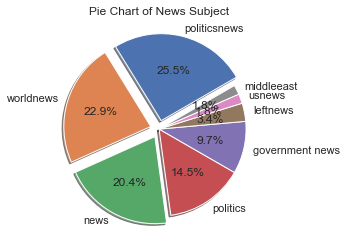

In [12]:
slices = df.subject.value_counts().to_list()
label = df.subject.unique()
explode = (0.1, 0.1, 0.1, 0,0,0,0,0) 
plt.pie(slices, labels = label, startangle = 30, shadow = True, explode=explode,autopct='%1.1f%%')
plt.title('Pie Chart of News Subject')
plt.show()

## 3.6 Visualizing high dimensional data<a id='3.6_Visualizing_high_dimensional_data'></a>

### 3.6.1 Creating unigrams from vectorized data<a id='3.6.1_Creating _unigrams_from_vectorized_data'></a>

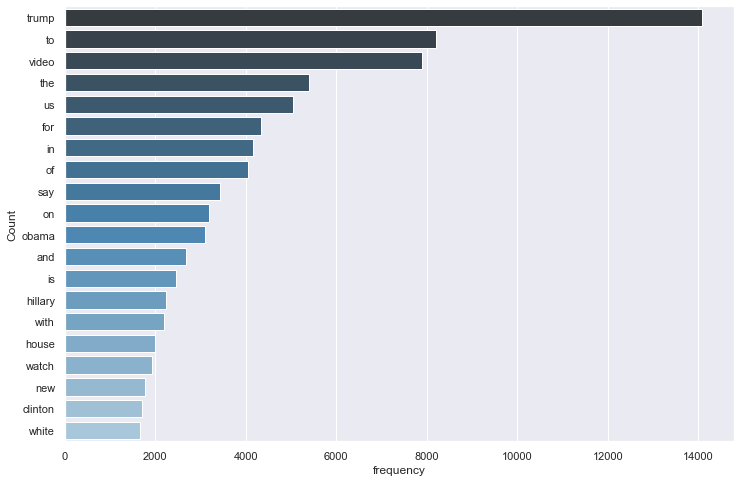

In [13]:
#top 20 unigrams
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['title'])
frequencies = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
word = word.nlargest(columns = "frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Blues_d"))
sns.set_context("poster")
ax.set(ylabel = "Count")
plt.show()

### 3.6.2 Creating bigrams from vectorized data<a id='3.6.2_Creating _bigrams_from_vectorized_data'></a>

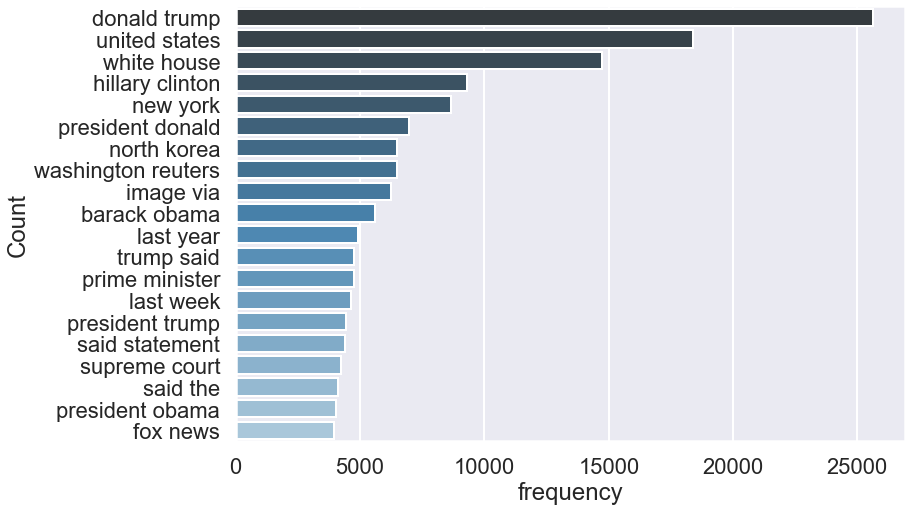

In [14]:
##top 20 bigrams
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['text'])
frequencies = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
word = word.nlargest(columns = "frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Blues_d"))
sns.set_context("poster")
ax.set(ylabel = "Count")
plt.show()

### 3.6.3 Creating trigrams from vectorized data<a id='3.6.3_Creating _trigrams_from_vectorized_data'></a>

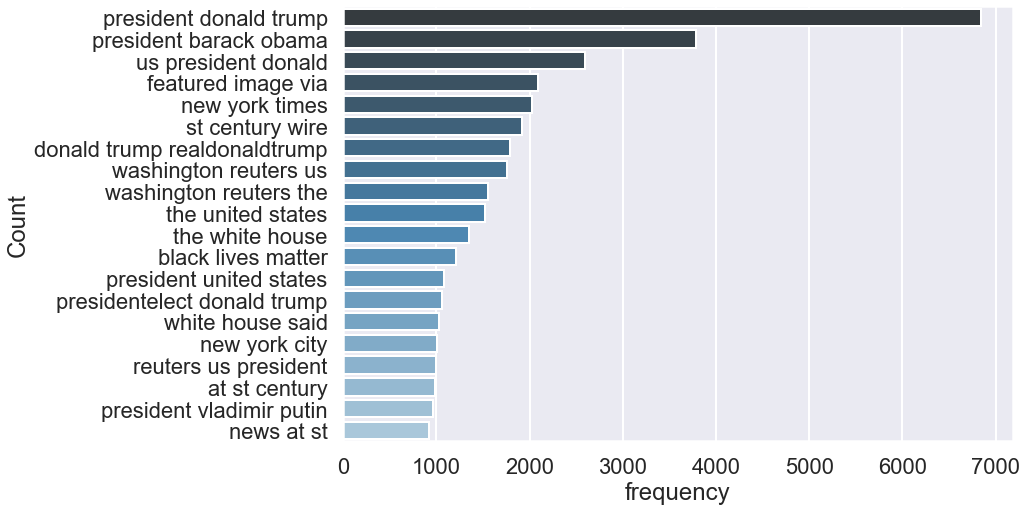

In [15]:
##top 20 trigrams
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df['text'])
frequencies = sum(sparse_matrix).toarray()[0]
word = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
word = word.nlargest(columns = "frequency", n = 20)
plt.figure(figsize=(12,8))
ax = sns.barplot(data = word, y = word.index, x = "frequency", palette=("Blues_d"))
sns.set_context("poster")
ax.set(ylabel = "Count")
plt.show()

## 3.7 Feature Engineering with Count Vectorizer and Tfidf Vectorizer<a id='3.7_Feature_Engineering_with_Count_Vectorizer_and_Tfidf_Vectorizer'></a>

In [16]:
df['allwords'] = df['title']+" "+df['text']+" "+df['subject']
df = df[['allwords','label']]
bow = CountVectorizer(analyzer = 'word').fit(df['allwords'])
vec = bow.transform(df['allwords'])

In [17]:
tfidf_transformer = TfidfTransformer().fit(vec)
df_tfidf = tfidf_transformer.transform(vec)

## 3.8 Initial Models and Performance Analysis<a id='3.8_Initial_Models_and_Performance_Analysis'></a>

In [18]:
X = df_tfidf
y = df['label']

In [19]:
X_train, X_test, Y_train,Y_test= train_test_split(X, y, test_size=0.2,random_state=1234)

### 3.8.1 MultiNomial Naive Bayes<a id='3.8.1_MultiNomial_Naive_Bayes'></a>

In [20]:
#Naive Bayes model
model_NB = MultinomialNB().fit(X_train, Y_train)
predictions_NB= model_NB.predict(X_test)

In [21]:
print (classification_report(Y_test, predictions_NB))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4537
           1       0.95      0.95      0.95      4317

    accuracy                           0.95      8854
   macro avg       0.95      0.95      0.95      8854
weighted avg       0.95      0.95      0.95      8854



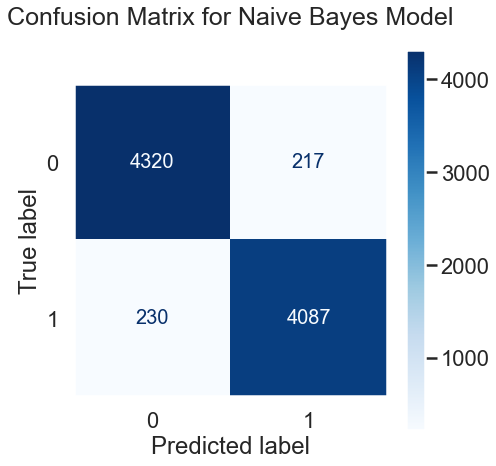

In [22]:
fig, ax = plt.subplots(figsize=(7,7))
label_font = {'size':'21'}  # Adjust to fit
plt.rcParams.update({'font.size': 20})
title_font = {'size':'25'}  # Adjust to fit
plot_confusion_matrix(model_NB, X_test, Y_test,cmap=plt.cm.Blues,ax=ax)
plt.grid(False)
plt.title('Confusion Matrix for Naive Bayes Model\n\n',fontdict=title_font)
plt.show()

ROC_AUC score Naive Bayes Model:0.9494466494801016


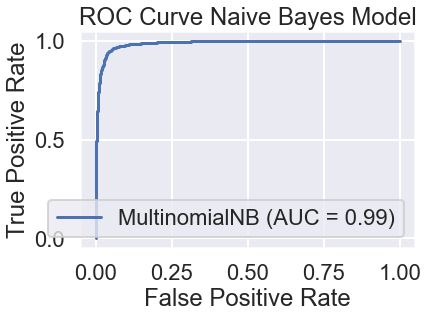

In [24]:
from sklearn.metrics import roc_auc_score

print('ROC_AUC score Naive Bayes Model:'+str(roc_auc_score(Y_test, predictions_NB)))
metrics.plot_roc_curve(model_NB, X_test, Y_test)
plt.title('ROC Curve Naive Bayes Model')
plt.show()

### 3.8.2 Logistic Regression<a id='3.8.2_Logistic_Regression'></a>

In [25]:
#logistic Regression Model
model_LR = LogisticRegression().fit(X_train, Y_train)
predictions_LR = model_LR.predict(X_test)
print (classification_report(Y_test, predictions_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4537
           1       0.99      0.99      0.99      4317

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854



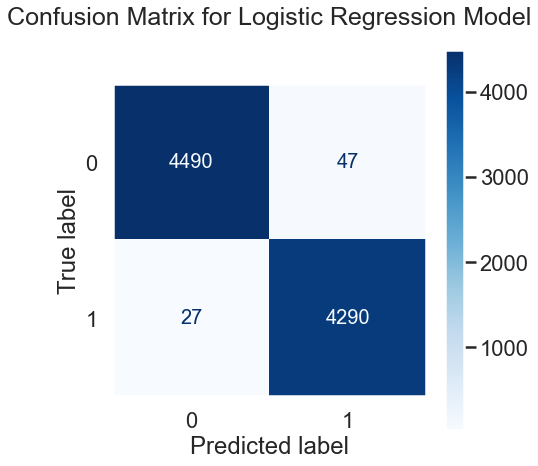

In [26]:
fig, ax = plt.subplots(figsize=(7,7))
label_font = {'size':'21'}  # Adjust to fit
plt.rcParams.update({'font.size': 20})
title_font = {'size':'25'}  # Adjust to fit
ax.set_title('Confusion Matrix for Logistic Regression Model\n\n', fontdict=title_font);
plot_confusion_matrix(model_LR, X_test, Y_test,cmap=plt.cm.Blues, ax=ax)
plt.grid(False)
plt.show()

ROC_AUC score Logistic Regression Model:0.9916931942335607


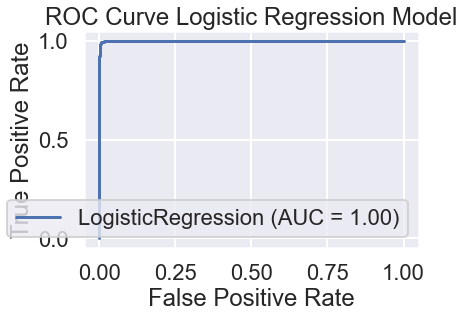

In [27]:
print('ROC_AUC score Logistic Regression Model:'+str(roc_auc_score(Y_test, predictions_LR)))
metrics.plot_roc_curve(model_LR, X_test, Y_test)
plt.title('ROC Curve Logistic Regression Model')
plt.show()

### 3.8.3 Support Vector Classifier<a id='3.8.3_Support_Vector_Classifier'></a>

In [28]:
#SVC model
model_SVC = SGDClassifier().fit(X_train, Y_train)
predictions_SVC = model_SVC.predict(X_test)
print (classification_report(Y_test, predictions_SVC))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4537
           1       0.99      1.00      0.99      4317

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854



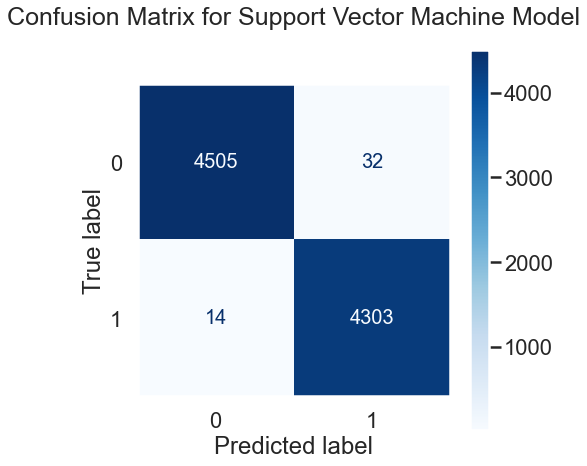

In [29]:
fig, ax = plt.subplots(figsize=(7,7))
label_font = {'size':'21'}  # Adjust to fit
plt.rcParams.update({'font.size': 20})
title_font = {'size':'25'}  # Adjust to fit
ax.set_title('Confusion Matrix for Support Vector Machine Model\n\n', fontdict=title_font);
plot_confusion_matrix(model_SVC, X_test, Y_test,cmap=plt.cm.Blues,ax=ax)
plt.grid(False)
plt.show()

ROC_AUC score SVC model:0.9948519441899715


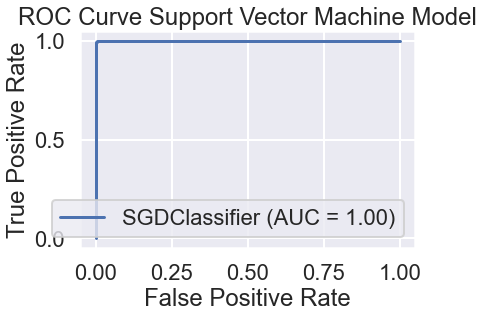

In [30]:
print('ROC_AUC score SVC model:'+str(roc_auc_score(Y_test, predictions_SVC)))
metrics.plot_roc_curve(model_SVC, X_test, Y_test)
plt.title('ROC Curve Support Vector Machine Model')
plt.show()

### 3.8.4 Random Forest Classifier<a id='3.8.4_Random_Forest_Classifier'></a>

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,15,20],
    'criterion' :['gini', 'entropy']
}
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
model_rfc = rfc_cv.fit(X_train,Y_train)
predictions_rfc = model_rfc.predict(X_test)
print (classification_report(Y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4537
           1       0.99      0.99      0.99      4317

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854



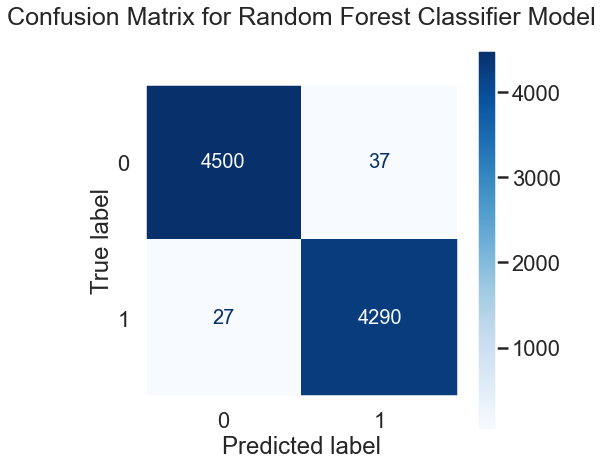

In [35]:
fig, ax = plt.subplots(figsize=(7,7))
label_font = {'size':'21'}  # Adjust to fit
plt.rcParams.update({'font.size': 20})
title_font = {'size':'25'}  # Adjust to fit
ax.set_title('Confusion Matrix for Random Forest Classifier Model\n\n', fontdict=title_font);
plot_confusion_matrix(model_rfc, X_test, Y_test,cmap=plt.cm.Blues,ax=ax)
plt.grid(False)
plt.show()

ROC_AUC score Random Forest:0.9927952440462122


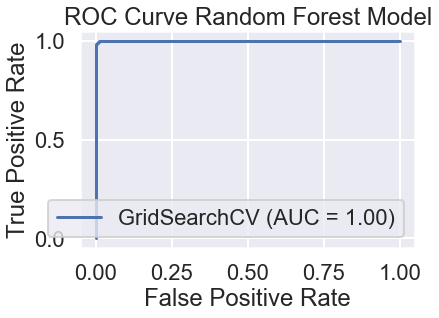

In [36]:
print('ROC_AUC score Random Forest:'+str(roc_auc_score(Y_test, predictions_rfc)))
metrics.plot_roc_curve(model_rfc, X_test, Y_test)
plt.title('ROC Curve Random Forest Model')
plt.show()

## 3.9 Summary<a id='3.9_Summary'></a>

From the 4 models it is observed that the exception of Naive Bayes all of them have very few mis-classification. THe ROC_AUC score is close to 0.995 which is exceptionally well for text classification.  However, looking at the n-gram analysis it can be inferred that the data is biased towards US Presidential Election and any news outside this scope might be difficult for the model to predict. We need a bigger dataset covering a wide range of news for both TRUE and FAKE labels to make a more generalized model. 